In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import geopandas as gpd
import matplotlib.pyplot as plt


## Sub-question 3: Trvalling Modes
###  Does the covid affects the transportation modes? A comparison between a wealthier and less wealthy country. 

This sub-question contributes to answering the main question because changes in transportation modes are a good indicator of the covid's impact on mobility. To answer this sub-question, transportation modes in the Netherlands and Poland are divided into four categories: road, bicycle, railway, and other, with road and bicycle considered private modes of transportation and railway considered public transportation. A bar chart and a pie chart show the impact of COVID during the pre-pandemic and pandemic periods, respectively. Finally, because biking is a special mode of transportation in the Netherlands, the average number of annual bike trips by province in 2020 and 2021 are plotted on maps.   

### 3.1 Import data

In [3]:
# import processed data
covid_df = pd.read_csv('./data/travelling modes/processed/CovidData.csv', delimiter=',')
TransModes_NL = pd.read_csv('./data/travelling modes/processed/TransModes-NL.csv', delimiter=',')
mode_percentage = pd.read_csv('./data/travelling modes/processed/mode_percentage.csv',delimiter=',')

### 3.2 Determines two periods representing pre-pandemic and pandemic
- Firstly, visualize the covid daily new cases data of the Netherlands and Poland in a line chart.
- Secondly, add some rectangular to show some interesting time points.

In [4]:
# visualize the imported data
fig = px.line(covid_df, x='date', y='new_cases', color='location', title='Daily new cases per 1 million people since Feb 2020')

# mark typical pre-pandemic period
fig.add_vrect(x0="2020-04-09", x1="2020-08-25", col=1,
              annotation_text="Pre-pandemic", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)

# mark typical pandemic shock 1
fig.add_vrect(x0="2020-10-26", x1="2020-11-23", col=1,
              annotation_text="Pandemic 1", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

# mark typical pandemic shock 1
fig.add_vrect(x0="2021-03-04", x1="2021-04-21", col=1,
              annotation_text="Pandemic 2", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

# mark typical pandemic shock 2
fig.add_vrect(x0="2022-01-03", x1="2022-02-25", col=1,
              annotation_text="Pandemic 3", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

The majority of 2020 (before October), as shown in the graph, can be considered a pre-pandemic period, with no discernible increase in the number of covid cases per million people. The first pandemic shock occurred at the end of this year, and a second pandemic shock occurred almost immediately after it in the middle of 2021. The Netherlands has a less obvious peak in the first two pandemic shocks then Poland. However, t he number of covid cases in the Netherlands reached a historical high at the third shock in early 2022.

Although the year 2022 has a much higher number of daily new cases, the year 2021 is actually a better one to represent the pandemic when the real-life situation is taken into account. In fact, the news of the covid had already spread by the end of 2020, and the pandemic shock at the start of 2021 was the first one people experienced, making them more vulnerable physically and psychologically. As a result, it is preferable to analyze data on transportation modes collected in 2021. The sections that follow use the years 2020 and 2021 to represent pre-pandemic and pandemic conditions, respectively, to examine the impact on transportation modes.  

### 3.3 Transportation modes in the year of 2020 and 2021 in the Netherlands and Poland

#### 3.3.1 Transportation modes in the Netherlands and Poland

This graph depicts the percentage distribution of different modes of transportation in the two countries from 2018 to 2021.

In [6]:
# plot bar chart
fig = px.bar(mode_percentage, x='Travel Modes', y='Percentage', animation_frame='Year', animation_group='Country',
            color='Travel Modes', text='Country', range_y=[0,100])
fig.update_layout(xaxis={'categoryorder':'total ascending'}, title_text="Transportation Modes in the Netherlands and Poland")

# drop animation buttons
fig["layout"].pop("updatemenus") 
fig.show()

This graph dipicts the proportion of each transportation mode of the two countries in the year 2020 and 2021.

In [7]:
# extract columns to be visualized
nl_2020 = mode_percentage[
    (mode_percentage['Year'] == 2020) &
    (mode_percentage['Country'] == 'The Netherlands')]

nl_2021 = mode_percentage[
    (mode_percentage['Year'] == 2021) &
    (mode_percentage['Country'] == 'The Netherlands')]

pl_2020 = mode_percentage[
    (mode_percentage['Year'] == 2020) &
    (mode_percentage['Country'] == 'Poland')]

pl_2021 = mode_percentage[
    (mode_percentage['Year'] == 2021) &
    (mode_percentage['Country'] == 'Poland')]

# create figure
fig = make_subplots(rows=2, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"}]])

# draw each subplot
fig.add_trace(go.Pie(
     values = nl_2020['Percentage'],
     labels = nl_2020['Travel Modes'],
     domain = dict(x=[0, 0.5], y=[0, 0.5]),
     title = "The Netherlands Transport modes in 2020"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values = nl_2021['Percentage'],
     labels = nl_2021['Travel Modes'],
     domain = dict(x=[0.5, 1], y=[0, 0.5]),
     title = "The Netherlands Transport modes in 2021"), 
     row=1, col=2)

fig.add_trace(go.Pie(
     values = pl_2020['Percentage'],
     labels = pl_2020['Travel Modes'],
     domain = dict(x=[0, 0.5], y=[0.5, 1]),
     title = "Poland Transport modes in 2020"), 
     row=2, col=1)

fig.add_trace(go.Pie(
     values = pl_2021['Percentage'],
     labels = pl_2021['Travel Modes'],
     domain = dict(x=[0.5, 1], y=[0.5, 1]),
     title = "Poland Transport modes in 2021"), 
     row=2, col=2)

fig.update_layout(height=700, width=900, title_text="Transportation Modes in the Netherlands and Poland in 2020 and 2021")
fig.show()



As shown in the pie chart, bicycle and railway transportation were the most important modes of transportation in the Netherlands and Poland respectively in both 2020 and 2021. When considering bicycle and road transport as private mode of transportation and railway as public mode of transportation, it is interesting to note that the transportation modes in the Netherlands barely changed between the two years, whereas Poland saw a decrease in public transportation in the year 2021. This change in transportation modes corresponds to the variation in the number of new daily cases, where there were two obvious pandemic shocks at the end of 2020 and beginning of 2021. This indicates that people tend to transfer to private transport after pandemic, which comlies with common sense. 

#### 3.3.2 Annual bycicle trips of the Netherlands in 2020 and 2021 

This cell extract rows of 'bike' travel modes in each province in the two years.   

In [8]:
# extract wanted rows and columns
bikeNl = TransModes_NL[TransModes_NL['Travel Modes']=='Bike']
bikeNl = bikeNl[bikeNl['Region'].str.contains('(LD)') == False]
bikeNl = bikeNl[bikeNl['Region'].str.contains('The Netherlands') == False]

# format column string
bikeNl['Region'] = bikeNl['Region'].str.replace('[ (PV)]', '')
bikeNl['Region'] = bikeNl['Region'].replace(['Fryslân'],'Friesland')

# bike trips in 2020
bike_2020 = bikeNl[(bikeNl['Trip Characteristics']=='Trip in June') & (bikeNl['Year']==2020)]
bike_2020 = bike_2020.drop_duplicates(subset=['Region'])
mean_value = bike_2020['Average Trip Per Year'].mean()
bike_2020['Average Bike Trips in 2020'] = bike_2020['Average Trip Per Year']
bike_2020['Average Bike Trips in 2020'].fillna(value=mean_value, inplace=True)
bike_2020 = bike_2020.loc[:, ['Region', 'Average Bike Trips in 2020']]
bike_2020 = bike_2020.reset_index(drop=True)

# bike trips in 2021
bike_2021 = bikeNl[(bikeNl['Trip Characteristics']=='Trip in June') & (bikeNl['Year']==2021)]
bike_2021 = bike_2021.drop_duplicates(subset=['Region'])
mean_value = bike_2021['Average Trip Per Year'].mean()
bike_2021['Average Bike Trips in 2021'] = bike_2021['Average Trip Per Year']
bike_2021['Average Bike Trips in 2021'].fillna(value=mean_value, inplace=True)
bike_2021 = bike_2021.loc[:, ['Region', 'Average Bike Trips in 2021']]
bike_2021 = bike_2021.reset_index(drop=True)

# import the Netherlands shapefile at province level
df_map = gpd.read_file('./data/travelling modes/processed/stanford-st293bj4601-geojson.json')
df_map = df_map[df_map['type_1'].str.contains('Water body') == False]
df_map = df_map.rename(columns={'name_1':'Region'})
df_map = df_map.reset_index(drop=True)

# merge dataframes
map_bike = pd.merge(df_map, bike_2020, on='Region')
map_bike = pd.merge(map_bike, bike_2021, on='Region')

/var/folders/rv/_wk364rj6zx3dwtsg07t65h00000gn/T/ipykernel_26863/2781687773.py:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

/var/folders/rv/_wk364rj6zx3dwtsg07t65h00000gn/T/ipykernel_26863/2781687773.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



This picture plots the annual trips made by bycicles in the Netherlands at the province level in the year of 2020 and 2021. 

<AxesSubplot:title={'center':'Average bike trips in 2021'}>

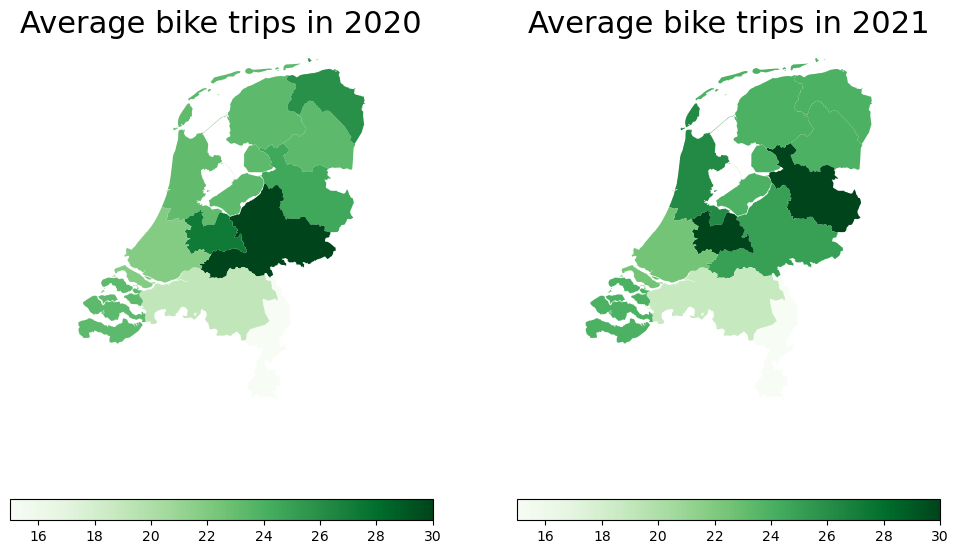

In [9]:
# create a picture
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(nrows=1, ncols=2)

# plot bike trips in 2020
ax1 = fig.add_subplot(gs[0,0])
ax1.axis('off')
ax1.set_title(
    'Average bike trips in 2020', 
    fontdict={'fontsize': '22', 'fontweight': '3'})

fig.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=15, vmax=30)), orientation="horizontal")
map_bike.plot(column="Average Bike Trips in 2020", cmap='Greens', linewidth=0.6, ax=ax1)


# plot bike trips in 2021
ax2 = fig.add_subplot(gs[0,1])
ax2.axis('off')
ax2.set_title(
    'Average bike trips in 2021', 
    fontdict={'fontsize': '22', 'fontweight': '3'})
fig.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=15, vmax=30)), orientation="horizontal")
map_bike.plot(column="Average Bike Trips in 2021", cmap='Greens', linewidth=0.6, ax=ax2)

Because cycling is an important mode of transportation in the Netherlands, the data of average bycicle trips from the year of 2020 and 2021 at the province level are visualized. In general, the second subplot's relatively more deepgreen areas indicate that there were more bike trips after the pandemic. This is consistent with the conclusion that the pandemic causes people to prefer private transportation when traveling.

### 3.3 Conclusion

As is analysised in the previous section, the pandemic changes people's preference on the travel modes, althouth this change is small. After the pandemic shock happened at the end of the 2020 and the beginning of 2021, many people in Poland changed their travel modes from the public modes to private modes. Because there is no obvious growth in cases in the Netherlands during the two pandemic shocks in Poland, the transportation modes in the Netherlands almost remain unchaged. However when looking at the avarage bike trips in the Netherlands in 2020 and 2021, many provinces have more people travel with bike and even the others remains the same level. 

In conclusion, the pandemic causes people to prefer private transport when travelling.